In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
test_df=pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')

In [3]:
def analyze_dataframe(df):
    print("DataFrame Information:")
    display(df.info())
    print("\n")
    
    print("DataFrame Values:")
    display(df.head(5).T)
    print("\n")

    print("DataFrame Description:")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
analyze_dataframe(train_df)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 no

None



DataFrame Values:


,0,1,2,3,4
id,0,1,2,3,4
loc,22.0,14.0,11.0,8.0,11.0
v(g),3.0,2.0,2.0,1.0,2.0
ev(g),1.0,1.0,1.0,1.0,1.0
iv(g),2.0,2.0,2.0,1.0,2.0
n,60.0,32.0,45.0,23.0,17.0
v,278.63,151.27,197.65,94.01,60.94
l,0.06,0.14,0.11,0.19,0.18
d,19.56,7.0,8.05,5.25,5.63
i,14.25,21.11,22.76,17.86,12.44




DataFrame Description:


,count,mean,std,min,25%,50%,75%,max
id,101763.0,50881.000000,29376.592059,0.0,25440.50,50881.00,76321.50,101762.00
loc,101763.0,37.347160,54.600401,1.0,13.00,22.00,42.00,3442.00
v(g),101763.0,5.492684,7.900855,1.0,2.00,3.00,6.00,404.00
ev(g),101763.0,2.845022,4.631262,1.0,1.00,1.00,3.00,165.00
iv(g),101763.0,3.498826,5.534541,1.0,1.00,2.00,4.00,402.00
n,101763.0,96.655995,171.147191,0.0,25.00,51.00,111.00,8441.00
v,101763.0,538.280956,1270.791601,0.0,97.67,232.79,560.25,80843.08
l,101763.0,0.111634,0.100096,0.0,0.05,0.09,0.15,1.00
d,101763.0,13.681881,14.121306,0.0,5.60,9.82,18.00,418.20
i,101763.0,27.573007,22.856742,0.0,15.56,23.36,34.34,569.78




Number of Null Values:


id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64



Number of Duplicated Rows:


0



Number of Unique Values:


id                   101763
loc                     378
v(g)                    106
ev(g)                    71
iv(g)                    84
n                       836
v                      4515
l                        55
d                      3360
i                      5171
e                      8729
b                       315
t                      8608
lOCode                  298
lOComment                91
lOBlank                  94
locCodeAndComment        29
uniq_Op                  70
uniq_Opnd               176
total_Op                623
total_Opnd              485
branchCount             144
defects                   2
dtype: int64



DataFrame Shape:
Rows: 101763, Columns: 23


In [4]:
train_df = train_df.drop(['id'], axis = 1)
test_df = test_df.drop(['id'], axis = 1)

<Axes: >

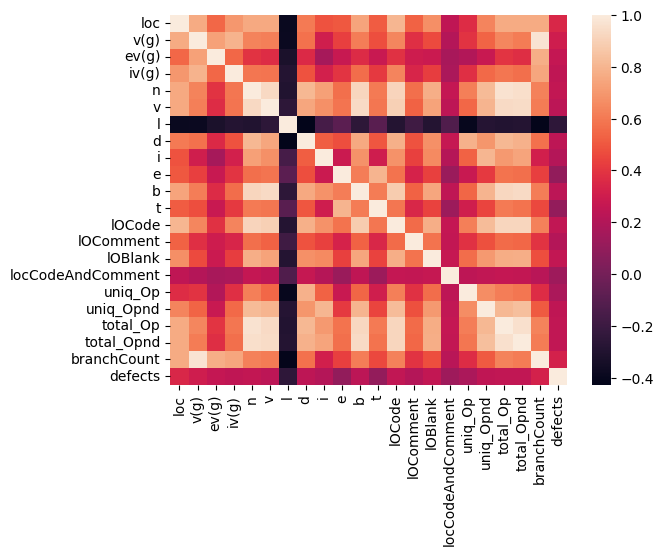

In [5]:
import seaborn as sns
sns.heatmap(train_df.corr())

In [6]:
correlation_matrix = train_df.corr()
for col in train_df.columns:
    high_correlations = correlation_matrix[correlation_matrix[col] > 0.8].index
    high_correlations = high_correlations.drop(col)
    if not high_correlations.empty:
        print(f"Column: {col}")
        for high_corr_col in high_correlations:
            correlation_value = correlation_matrix.at[col, high_corr_col]
            print(f"  {high_corr_col}: {correlation_value:.2f}")
        print()


Column: loc
  lOCode: 0.80

Column: v(g)
  branchCount: 0.97

Column: n
  v: 0.93
  d: 0.81
  b: 0.92
  lOCode: 0.91
  uniq_Opnd: 0.82
  total_Op: 0.96
  total_Opnd: 0.95

Column: v
  n: 0.93
  b: 0.94
  lOCode: 0.90
  total_Op: 0.94
  total_Opnd: 0.94

Column: d
  n: 0.81
  total_Op: 0.81

Column: i
  uniq_Opnd: 0.80

Column: b
  n: 0.92
  v: 0.94
  lOCode: 0.88
  total_Op: 0.92
  total_Opnd: 0.94

Column: lOCode
  loc: 0.80
  n: 0.91
  v: 0.90
  b: 0.88
  uniq_Opnd: 0.83
  total_Op: 0.92
  total_Opnd: 0.92

Column: uniq_Opnd
  n: 0.82
  i: 0.80
  lOCode: 0.83
  total_Op: 0.81
  total_Opnd: 0.84

Column: total_Op
  n: 0.96
  v: 0.94
  d: 0.81
  b: 0.92
  lOCode: 0.92
  uniq_Opnd: 0.81
  total_Opnd: 0.96

Column: total_Opnd
  n: 0.95
  v: 0.94
  b: 0.94
  lOCode: 0.92
  uniq_Opnd: 0.84
  total_Op: 0.96

Column: branchCount
  v(g): 0.97



In [7]:
correlations = train_df.corr()['defects'].drop('defects')
least_corr_features = correlations.nsmallest(10)  
print("Least correlated features with 'price':")
print(least_corr_features)

Least correlated features with 'price':
l                   -0.253237
e                    0.095366
t                    0.099592
locCodeAndComment    0.133150
uniq_Op              0.178474
lOComment            0.205402
i                    0.208577
v                    0.231179
b                    0.232594
d                    0.241936
Name: defects, dtype: float64


In [8]:
un= ['v','n','b','total_Op','lOCode','e','t','locCodeAndComment','uniq_Op']
train_df.drop(un,axis=1,inplace=True)
test_df.drop(un,axis=1,inplace=True)

In [9]:
train_df

,loc,v(g),ev(g),iv(g),l,d,i,lOComment,lOBlank,uniq_Opnd,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,0.06,19.56,14.25,1,1,9.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,0.14,7.00,21.11,0,1,11.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,0.11,8.05,22.76,0,1,11.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,0.19,5.25,17.86,0,2,6.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,0.18,5.63,12.44,0,2,6.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,0.15,6.60,18.63,0,1,8.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,0.06,18.00,34.17,0,2,20.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,0.04,22.75,12.56,0,4,8.0,28.0,1.0,False
101761,10.0,2.0,1.0,2.0,0.15,6.46,29.53,0,1,14.0,19.0,3.0,False


In [10]:
features = test_df.columns.to_list()
print(features)

['loc', 'v(g)', 'ev(g)', 'iv(g)', 'l', 'd', 'i', 'lOComment', 'lOBlank', 'uniq_Opnd', 'total_Opnd', 'branchCount']


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def standardize_features(df, features, method='zscore'):
    df_copy = df.copy()
    data_to_scale = df_copy[features]
    if method == 'zscore':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid method. Choose from 'zscore', 'minmax', or 'robust'.")
    standardized_data = scaler.fit_transform(data_to_scale)
    df_copy[features] = standardized_data
    return df_copy
train_df = standardize_features(train_df, features, method='minmax')
test_df = standardize_features(test_df, features, method='minmax')

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train = train_df[features]
y_train = train_df['defects']
model = LogisticRegression(max_iter=10000)
scores = cross_val_score(model, X_train, y_train, cv=10)
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.79836887 0.80328191 0.79748452 0.80336085 0.80041274 0.80208333
 0.79933176 0.79707154 0.80296777 0.79913522]
Average cross-validation score: 0.8003498512646905


In [13]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
X = train_df.drop('defects', axis=1)
y = train_df['defects']

model = xgb.XGBClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') 

print("Cross-Validation Accuracy Scores:")
print(scores)

mean_accuracy = sum(scores) / len(scores)
print(f"Mean Accuracy: {mean_accuracy}")

Cross-Validation Accuracy Scores:
[0.81147742 0.81162482 0.81113349 0.80655464 0.8090114 ]
Mean Accuracy: 0.8099603553877831


In [14]:
from sklearn.ensemble import RandomForestClassifier
X = train_df.drop('defects', axis=1)
y = train_df['defects']
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:")
print(scores)
mean_accuracy = sum(scores) / len(scores)
print(f"Mean Accuracy: {mean_accuracy}")

Cross-Validation Accuracy Scores:
[0.80445143 0.80258439 0.80626935 0.80321344 0.80616156]
Mean Accuracy: 0.8045360327715816


In [15]:
X_train = train_df.drop('defects', axis=1) 
y_train = train_df['defects']  
X_test = test_df
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [16]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e23/sample_submission.csv')
submission['defects'] = predictions
submission.to_csv('lc_submission.csv', index = False)
submission

,id,defects
0,101763,False
1,101764,False
2,101765,True
3,101766,False
4,101767,False
...,...,...
67837,169600,False
67838,169601,False
67839,169602,False
67840,169603,False
